# IEEE Fraud Detection

La d√©tection des fraudes en ligne est l'une des probl√©matiques les plus courantes et sensibles dans de nombreux secteurs, en particulier les banques. Au cours des derni√®res ann√©es, les tentatives de fraude ont connu une forte hausse, ce qui rend la lutte contre ce ph√©nom√®ne tr√®s importante. 

Cette comp√©tition est un probl√®me de classification binaire - c'est-√†-dire que notre variable cible est un attribut binaire (l'utilisateur fait-il le clic frauduleux ou non?)

Et notre objectif est de classer les utilisateurs en "frauduleux" ou "non frauduleux" le mieux possible.

On cherche √† pr√©dire la probabilit√© qu'une transaction en ligne soit frauduleuse.

# Packages n√©cessaires

In [1]:
import numpy as np     
import pandas as pd   
import matplotlib.pyplot as plt   
import seaborn as sns        

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
import random
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

sns.set() 

# Import des donn√©es

Commen√ßons par v√©rifier les donn√©es submission.

In [2]:
data_sub = pd.read_csv('C:/Users/boubekeur/Documents/datacamp/sample_submission.csv')
data_sub.head()

TransactionID  isFraud
0        3663549      0.5
1        3663550      0.5
2        3663551      0.5
3        3663552      0.5
4        3663553      0.5

In [3]:
del data_sub

On charge maintenant, les donn√©es trains et tests. Les donn√©es sont divis√©es en deux fichiers d'identit√© et de transaction

In [27]:
train_id = pd.read_csv('C:/Users/boubekeur/Documents/datacamp/train_identity.csv')
train_trans = pd.read_csv('C:/Users/boubekeur/Documents/datacamp/train_transaction.csv')
test_id = pd.read_csv('C:/Users/boubekeur/Documents/datacamp/test_identity.csv')
test_trans = pd.read_csv('C:/Users/boubekeur/Documents/datacamp/test_transaction.csv')

In [28]:
train_id.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

On rassemble les donn√©es train et test via la variable TransactionID.

In [29]:
TransactionID = test_id["TransactionID"]

In [30]:
train = pd.merge(train_trans, train_id, on='TransactionID', how='left')
test = pd.merge(test_trans, test_id, on='TransactionID', how='left')

In [31]:
del train_id, train_trans, test_id, test_trans

 - R√©duction de m√©moire

In [32]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [33]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


# Visualisation des donn√©es

Tout d'abord, on visualise les donn√©es √† l'aide de graphiques et de tests statistiques.

**Donn√©es "object"**

In [34]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
print(cat_cols)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


 Variables discr√®tes :

 - ProductCD
 - emaildomain
 - card1 - card6
 - addr1, addr2
 - P_emaildomain
 - R_emaildomain
 - M1 - M9
 - DeviceType
 - DeviceInfo
 - id_12 - id_38

Le reste des variables sont num√©riques.

Nous avons quelques informations sur certaines variables :

 - TransactionDT: timedelta √† partir d'une datetime de r√©f√©rence donn√©e (pas un horodatage r√©el)
 - TransactionAMT: c'est le montant de la transaction en USD
 - ProductCD: code produit pour chaque transaction
 - card1 - card6: Informations sur la carte de paiement
 - addr: adresse de l'acheteur et du destinataire
 - addr1: r√©gion de facturation
 - addr2: pays de facturation
 - dist: distance entre (sans limitation) l'adresse de facturation, l'adresse postale, le code postal, l'adresse IP, la zone t√©l√©phonique, etc. 
 - Domaine de messagerie P_ et (R_): domaine de messagerie de l'acheteur et du destinataire 
 - C1-C14: comptage, comme le nombre d'adresses associ√©es √† la carte de paiement, etc. La signification r√©elle est masqu√©e. 
 - D1-D15: Timedelta, comme les jours entre la transaction pr√©c√©dente, etc. 
 - M1-M9: Correspondance, comme les noms sur la carte et l'adresse, etc.
 - Vxxx: Vesta a con√ßu de riches fonctionnalit√©s, notamment le classement, le comptage et d'autres relations d'entit√©.
 - id01-id11: Fonctionnalit√©s num√©riques pour l'identit√©
 - IsFraud = 1 signifie transaction fradulente, sinon transaction non-fradulente.

## Target : isFraud

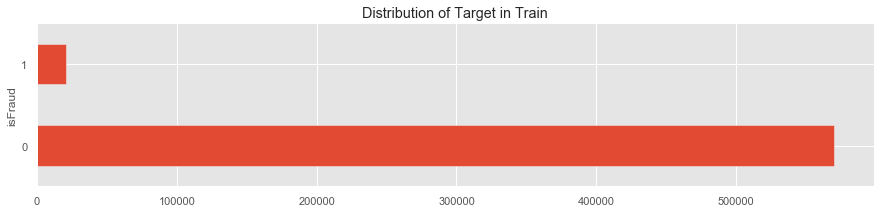

In [35]:
train.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribution of Target in Train',
          figsize=(15, 3))
plt.show()

On peut voir clairement que la plupart des transactions sont non frauduleuses. 

Si on utilise cette base de donn√©es comme base pour nos mod√®les pr√©dictifs et nos analyses, nous pourrions obtenir beaucoup d'erreurs et nos algorithmes seront probablement trop adapt√©s car ils "supposeront" que la plupart des transactions ne sont pas frauduleuses.

## Transaction Amt

Cette variable d√©crit le montant de la transaction.

On trace la distribution du logarithme de cette variable pour obtenir une repr√©sentation de la variable plus lisible.

In [36]:
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

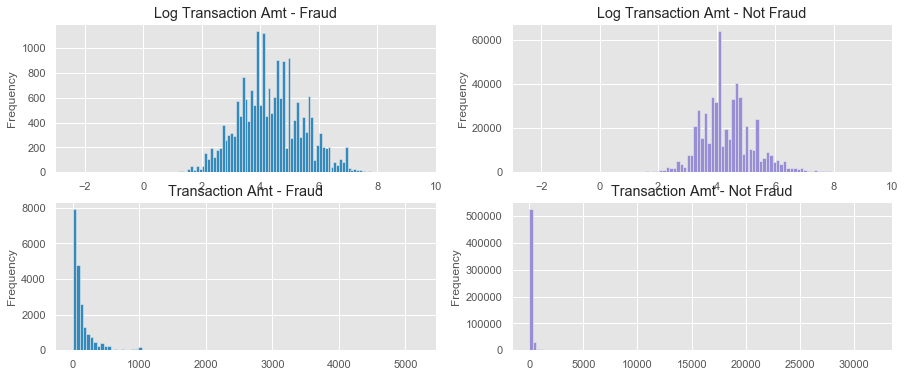

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()


In [38]:
print('Mean transaction amt for fraud is {:.4f}'.format(train.loc[train['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train.loc[train['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is inf
Mean transaction amt for non-fraud is nan


In [39]:
from scipy import stats
print(stats.ttest_ind(train.loc[train['isFraud'] == 1] \
    ['TransactionAmt'] ,train.loc[train['isFraud'] == 0] \
    ['TransactionAmt'] ,equal_var=False))

Ttest_indResult(statistic=0.0, pvalue=1.0)


On teste si la moyenne du montant des transactions dans le groupe des transactions frauduleuses et √©gale √† la moyenne du montant des transactions dans le groupe des transactions non-frauduleuses.

En faisant un test de student on remarque qu'il y a une diff√©rence significative entre les deux moyennes.

## ProductCD

Le produit pour chaque transaction.

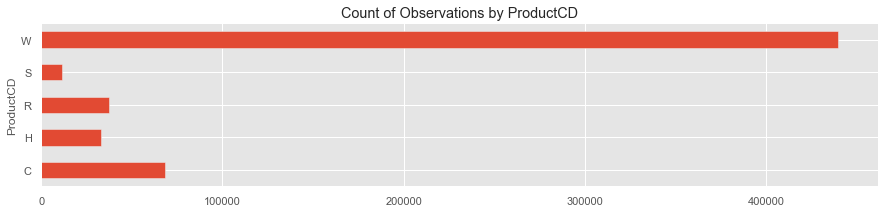

In [40]:
train.groupby('ProductCD') \
    ['TransactionID'].count() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Count of Observations by ProductCD')
plt.show()

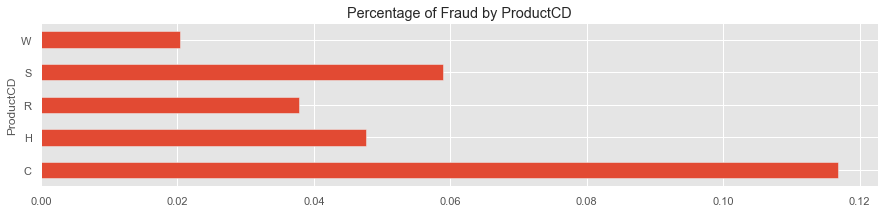

In [41]:
train.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD')
plt.show()

On observe que :
 - W a le plus grand nombre d'observations, S a le moins.
 - C a le plus grand pourcentage de fraude >11%
 - W a le moins avec <2%

## card1 - card6

Informations sur les cartes de paiement.

In [42]:
card_cols = [c for c in train.columns if 'card' in c]
train[card_cols].head()

card1  card2  card3       card4  card5   card6
0  13926    NaN  150.0    discover  142.0  credit
1   2755  404.0  150.0  mastercard  102.0  credit
2   4663  490.0  150.0        visa  166.0   debit
3  18132  567.0  150.0  mastercard  117.0   debit
4   4497  514.0  150.0  mastercard  102.0  credit

In [43]:
color_idx = 0
for c in card_cols:
    if train[c].dtype in ['float64','int64']:
        train[c].plot(kind='hist',
                                      title=c,
                                      bins=50,
                                      figsize=(15, 2),
                                      color=color_pal[color_idx])
    color_idx += 1
    plt.show()

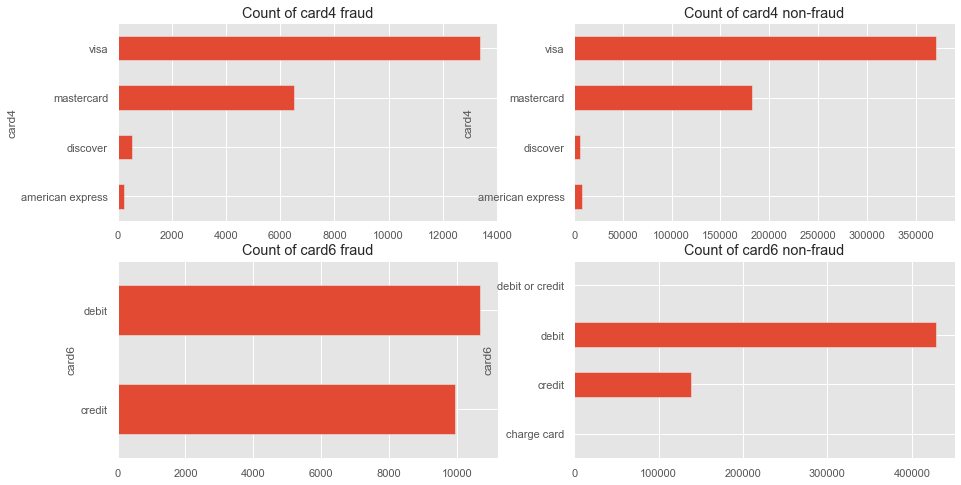

In [44]:
train_fr = train.loc[train['isFraud'] == 1]
train_nofr = train.loc[train['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_fr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='Count of card4 fraud')
train_nofr.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='Count of card4 non-fraud')
train_fr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='Count of card6 fraud')
train_nofr.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='Count of card6 non-fraud')
plt.show()

## DeviceType

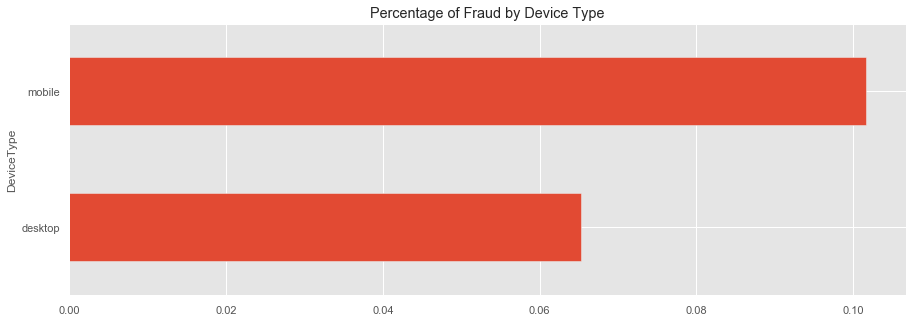

In [45]:
train.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

## DeviceInfo

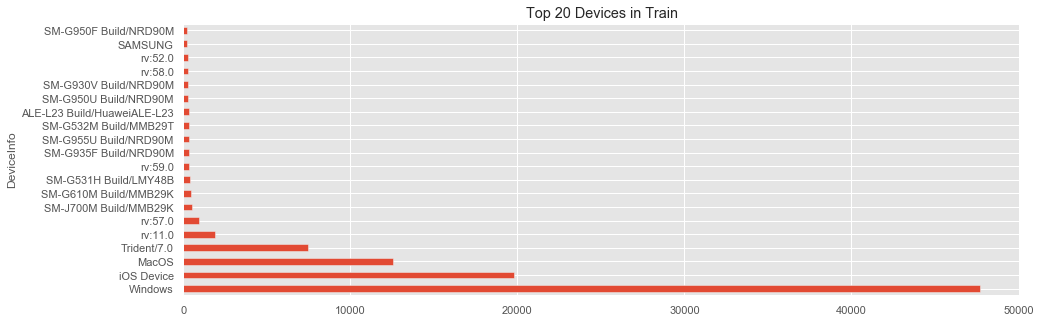

In [46]:
train.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(20) \
    .plot(kind='barh', figsize=(15, 5), title='Top 20 Devices in Train')
plt.show()

## TransactionDT

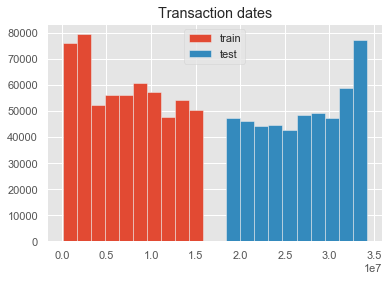

In [47]:
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Transaction dates');

Ci-dessus, on voit que les dates des donn√©es Train et Test ont une intersection vide.

In [48]:
y_train = train.isFraud
train = train.drop(['isFraud', 'TransactionID'],axis= 1)
transactionIDTest = test['TransactionID']
test = test.drop('TransactionID', axis= 1)
train.shape, test.shape

((590540, 432), (506691, 432))

# Valeurs manquantes

**Nettoyage des NaN**

**Train**

In [49]:
missing_values_count = train.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
card2              8933
card3              1565
card4              1577
card5              4259
card6              1571
addr1             65706
dtype: int64
% of missing data =  45.283049553515994


On peut voir que 45% des donn√©es du train sont des valeurs manquantes, nettoyons tout √ßa !

In [50]:
train['id_03'].value_counts(dropna=False, normalize=True).head()

NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64

 - On supprime les variables qui ont plus de 80% de NA

In [51]:
def get_too_many_null_attr(data):
    many_null_cols = [col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.8]
    return many_null_cols

In [52]:
null_cols = get_too_many_null_attr(train)
train.drop(null_cols,1,inplace=True)

In [53]:
def get_too_many_repeated_val(data):
    big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
    return big_top_value_cols

On peut voir que 88% des donn√©es sont des NaN, et 10% sont des valeurs nulles. Soit 98% des donn√©es sont des valeurs manquantes, donc inutiles !

On s√©pare les variables qualitatives et quantitatives : 

In [54]:
mask1 = train.dtypes==object
categoricalColumns = train.columns[mask1]
categoricalFeatures = train[categoricalColumns]
categoricalFeatures.head()

ProductCD       card4   card6 P_emaildomain R_emaildomain   M1   M2   M3  \
0         W    discover  credit           NaN           NaN    T    T    T   
1         W  mastercard  credit     gmail.com           NaN  NaN  NaN  NaN   
2         W        visa   debit   outlook.com           NaN    T    T    T   
3         W  mastercard   debit     yahoo.com           NaN  NaN  NaN  NaN   
4         H  mastercard  credit     gmail.com           NaN  NaN  NaN  NaN   

    M4   M5  ...     id_16 id_28     id_29                id_31 id_35 id_36  \
0   M2    F  ...       NaN   NaN       NaN                  NaN   NaN   NaN   
1   M0    T  ...       NaN   NaN       NaN                  NaN   NaN   NaN   
2   M0    F  ...       NaN   NaN       NaN                  NaN   NaN   NaN   
3   M0    T  ...       NaN   NaN       NaN                  NaN   NaN   NaN   
4  NaN  NaN  ...  NotFound   New  NotFound  samsung browser 6.2     T     F   

  id_37 id_38 DeviceType                     DeviceInfo  
0   NaN   NaN        NaN                            NaN  
1   NaN   NaN        NaN                            NaN  
2   NaN   NaN        NaN                            NaN  
3   NaN   NaN        NaN                            NaN  
4     T     T     mobile  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 26 columns]

In [55]:
mask2 = train.dtypes!=object
numericalColumns = train.columns[mask2]
numericalFeatures = train[numericalColumns]
numericalFeatures.head()

TransactionDT  TransactionAmt  card1  card2  card3  card5  addr1  addr2  \
0          86400            68.5  13926    NaN  150.0  142.0  315.0   87.0   
1          86401            29.0   2755  404.0  150.0  102.0  325.0   87.0   
2          86469            59.0   4663  490.0  150.0  166.0  330.0   87.0   
3          86499            50.0  18132  567.0  150.0  117.0  476.0   87.0   
4          86506            50.0   4497  514.0  150.0  102.0  420.0   87.0   

   dist1   C1  ...  V321  id_01    id_02  id_05  id_06  id_11  id_13  id_17  \
0   19.0  1.0  ...   0.0    NaN      NaN    NaN    NaN    NaN    NaN    NaN   
1    NaN  1.0  ...   0.0    NaN      NaN    NaN    NaN    NaN    NaN    NaN   
2  287.0  1.0  ...   0.0    NaN      NaN    NaN    NaN    NaN    NaN    NaN   
3    NaN  2.0  ...   0.0    NaN      NaN    NaN    NaN    NaN    NaN    NaN   
4    NaN  1.0  ...   0.0    0.0  70787.0    NaN    NaN  100.0    NaN  166.0   

   id_19  id_20  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4  542.0  144.0  

[5 rows x 332 columns]

## Corr√©lations entre les variables num√©riques

On cherche √† observer visuellement s'il existe des corr√©lations entre certaines variables.

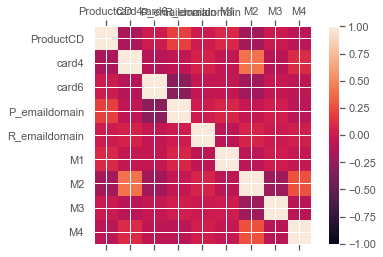

id_01     id_02     id_05     id_06     id_11     id_13     id_17  \
id_01  1.000000 -0.142064  0.009666  0.201637  0.014431  0.088596 -0.180504   
id_02 -0.142064  1.000000 -0.101547 -0.047041  0.053744 -0.035814  0.412987   
id_05  0.009666 -0.101547  1.000000 -0.291584 -0.043001 -0.036637 -0.203021   
id_06  0.201637 -0.047041 -0.291584  1.000000  0.020806  0.074835 -0.028708   
id_11  0.014431  0.053744 -0.043001  0.020806  1.000000 -0.063345  0.062676   
id_13  0.088596 -0.035814 -0.036637  0.074835 -0.063345  1.000000 -0.075997   
id_17 -0.180504  0.412987 -0.203021 -0.028708  0.062676 -0.075997  1.000000   
id_19  0.000519 -0.093068 -0.023800  0.029647  0.004058  0.017657 -0.214211   
id_20 -0.071238  0.108523 -0.058070 -0.071015  0.036318 -0.029427  0.278472   

          id_19     id_20  
id_01  0.000519 -0.071238  
id_02 -0.093068  0.108523  
id_05 -0.023800 -0.058070  
id_06  0.029647 -0.071015  
id_11  0.004058  0.036318  
id_13  0.017657 -0.029427  
id_17 -0.214211  0.278472  
id_19  1.000000 -0.088309  
id_20 -0.088309  1.000000

In [56]:
correlations = numericalFeatures[['id_01','id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(categoricalFeatures)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations


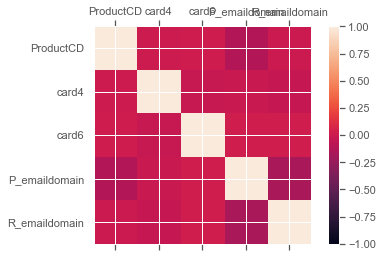

TransactionAmt  TransactionDT     card2     card3     card5
TransactionAmt        1.000000       0.011920  0.016136 -0.109788  0.003061
TransactionDT         0.011920       1.000000 -0.019202 -0.011222 -0.024132
card2                 0.016136      -0.019202  1.000000  0.023816  0.030486
card3                -0.109788      -0.011222  0.023816  1.000000 -0.158383
card5                 0.003061      -0.024132  0.030486 -0.158383  1.000000

In [57]:
correlations = numericalFeatures[['TransactionAmt','TransactionDT','card2','card3','card5']].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names = ['']+list(categoricalFeatures)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

On remarque qu'il n'y a pas de corr√©lations flagrante entre ces variables.

 - Normalisation des variables num√©riques : 
 
 $\frac{X - \mu}{\sigma}$, avec $\mu$ : la moyenne de X et $\sigma$ : l'√©cart-type de X.

In [58]:
numericalFeatures = (numericalFeatures-numericalFeatures.mean())/numericalFeatures.std()

In [59]:
numericalFeatures.head()

TransactionDT  TransactionAmt     card1     card2     card3     card5  \
0      -1.577985       -0.278076  0.821695       NaN -0.286621 -1.387695   
1      -1.577985       -0.443359 -1.457557  0.263184 -0.286621 -2.357422   
2      -1.577970       -0.317871 -1.068262  0.808105 -0.286621 -0.806152   
3      -1.577964       -0.355469  1.679857  1.295898 -0.286621 -1.994141   
4      -1.577962       -0.355469 -1.102132  0.960449 -0.286621 -2.357422   

      addr1     addr2     dist1        C1  ...      V321     id_01     id_02  \
0  0.238281  0.069641 -0.267578 -0.097961  ... -0.074143       NaN       NaN   
1  0.336670  0.069641       NaN -0.097961  ... -0.074143       NaN       NaN   
2  0.385742  0.069641  0.453369 -0.097961  ... -0.074143       NaN       NaN   
3  1.820312  0.069641       NaN -0.090515  ... -0.074143       NaN       NaN   
4  1.270508  0.069641       NaN -0.097961  ... -0.074143  0.708984 -0.650977   

   id_05  id_06     id_11  id_13     id_17     id_19     id_20  
0    NaN    NaN       NaN    NaN       NaN       NaN       NaN  
1    NaN    NaN       NaN    NaN       NaN       NaN       NaN  
2    NaN    NaN       NaN    NaN       NaN       NaN       NaN  
3    NaN    NaN       NaN    NaN       NaN       NaN       NaN  
4    NaN    NaN  0.221802    NaN -0.773438  1.337891 -1.708984  

[5 rows x 332 columns]

Si une variable a la m√™me valeur, la nouvelle valeur apr√®s normalisation sera √©gale √† NaN. 

Ainsi, nous supprimerons les variables qui ont des NaN apr√®s la normalisation.

In [60]:
nonNull = numericalFeatures.isnull().sum() != 0
columnNonNullScaled = numericalFeatures.columns[nonNull]
columnNonNullScaled

Index(['card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'D1', 'D2', 'D3',
       'D4',
       ...
       'V321', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17',
       'id_19', 'id_20'],
      dtype='object', length=315)

In [61]:
numericalFeatures = numericalFeatures.drop(columnNonNullScaled, axis = 1)

In [62]:
nonNull = numericalFeatures.isnull().sum() != 0
columnNonNull = numericalFeatures.columns[nonNull]
columnNonNull

Index([], dtype='object')

In [63]:
numericalFeatures.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'],
      dtype='object')

## Pr√©-traitement de l'√©chantillon Test

Dans un premier temps, on renomme le nom des colonnes de l'ensemble de donn√©es de test: on remplace - par _

In [64]:
droppedColumnsTest = []
for i in test.columns:
  a = i.replace('-','_')
  droppedColumnsTest.append(a)
test.columns = droppedColumnsTest

 - Extraction des variables num√©riques et qualitatives

In [65]:
X_testCategorical = test[categoricalFeatures.columns]

In [66]:
X_testNumerical  = test[numericalFeatures.columns]

 - Suppression des variables contenant plus de 80% de valeurs manquantes

In [67]:
null_cols = get_too_many_null_attr(X_testNumerical)
X_testNumerical.drop(null_cols,1,inplace=True)

On v√©rifie si les variables cat√©gorielles du train et du test ont le m√™me nombre de valeurs uniques avant l'encodage

In [68]:
categoricalFeatures.describe()

ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      439670  384767  439938        228355         57147  319415  285468   

            M3      M4      M5  ...   id_16   id_28   id_29        id_31  \
count   319440  309096  240058  ...  129340  140978  140978       140282   
unique       2       3       2  ...       2       2       2          130   
top          T      M0       F  ...   Found   Found   Found  chrome 63.0   
freq    251731  196405  132491  ...   66324   76232   74926        22000   

         id_35   id_36   id_37   id_38 DeviceType DeviceInfo  
count   140985  140985  140985  140985     140810     118666  
unique       2       2       2       2          2       1786  
top          T       F       T       F    desktop    Windows  
freq     77814  134066  110452   73922      85165      47722  

[4 rows x 26 columns]

In [69]:
X_testCategorical.describe()

ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     506691  503605  503684        437499        135870  330052  330052   
unique         5       4       3            60            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      360987  334882  385021        207448         61738  330021  302855   

            M3      M4      M5  ...   id_16   id_28   id_29        id_31  \
count   330052  268946  197059  ...  125747  136778  136778       136625   
unique       2       3       2  ...       2       2       2          135   
top          T      M0       F  ...   Found   Found   Found  chrome 70.0   
freq    266513  161384  107664  ...   66481   75581   74338        16054   

         id_35   id_36   id_37   id_38 DeviceType DeviceInfo  
count   136977  136977  136977  136977     136931     115057  
unique       2       2       2       2          2       2226  
top          T       F       T       F    desktop    Windows  
freq     71650  133287  104697   95058      74403      44988  

[4 rows x 26 columns]

On remarque que certaines variables cat√©gorielles ont une valeur unique diff√©rente dans le train et dans le test. 

Cela conduira √† diff√©rentes formes du train et du test. On a alors d√©cid√© de supprimer ces variables.

Suppression des variables cat√©gorielles ayant des valeurs uniques diff√©rentes dans le train et le test, avant l'encodage

In [70]:
A = []
for i in X_testCategorical.columns:
  if len(X_testCategorical[i].value_counts()) != len(categoricalFeatures[i].value_counts()):
    A.append(i)
A

['card6', 'P_emaildomain', 'id_31', 'DeviceInfo']

In [71]:
categoricalFeatures = categoricalFeatures.drop(A, axis = 1)
X_testCategorical = X_testCategorical.drop(A, axis = 1)

## Les cha√Ænes de caract√®res : one hot encoder

Pour pourvoir utiliser les variables contenant des cha√Ænes de caract√®res, on utilise la m√©thode de one hot encoder qui consiste √† cr√©er des nouvelles colonnes correspondant √† chaque valeur que peut prendre les variables qualitatives, puis inscrire la valeur 1 si un individu a pour valeur de variable le nom de la colonne, 0 sinon.

En effet, nous n'utiliserons pas la m√©thode de label encoder consistant √† remplacer les valeurs des variables qualitatives par des chiffres car cela impliquerait qu'il y aurait des relations de sup√©riorit√© entre les valeurs qualitatives.

On utilise la m√©thode _get_dummies_ pour coder les variables cat√©gorielles du train et du test

In [72]:
def encodingTrain():
  x = pd.get_dummies(categoricalFeatures, columns= categoricalFeatures.columns)
  return x.join(numericalFeatures) 

In [73]:
X_trainEncoded = encodingTrain()

In [75]:
def encodingTest():
  x = pd.get_dummies(X_testCategorical, columns= X_testCategorical.columns) 
  return x.join(X_testNumerical)

In [76]:
X_testEncoded = encodingTest()

On v√©rifie la forme des ensembles du train et du test apr√®s l'encodage

In [77]:
X_trainEncoded.shape, X_testEncoded.shape, y_train.shape

((590540, 126), (506691, 126), (590540,))

On v√©rifie si y a pas de NAN dans le train et le test apr√®s l'encodage

In [78]:
nonNull = X_trainEncoded.isnull().sum() != 0
columnNonNull = X_trainEncoded.columns[nonNull]
columnNonNull

Index([], dtype='object')

In [79]:
nonNull = X_testEncoded.isnull().sum() != 0
columnNonNull = X_testEncoded.columns[nonNull]
columnNonNull

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14'],
      dtype='object')

On v√©rifie si le nom des colonnes dans le train et le test est le m√™me

In [80]:
A = X_trainEncoded.columns == X_testEncoded.columns
A.sum() == len(X_trainEncoded.columns)

True

Le nom des colonnes dans le train et dans le test est le m√™me. 

Maintenant, on va construire le mod√®le qui peut √©viter le surapprentissage car on a beaucoup de variables.

# Pr√©diction de la probabilit√© du nombre de fraudes

In [81]:
Y = y_train 
X = X_trainEncoded

#### Split nos donn√©es en train(67%) et test(33%)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Naive Bayes

Dans un premier temps, nous avons appliqu√© le classifier Naive Bayes.
Son utilisation ne n√©cessite pas l'ajustement des hyperparam√®tres.

La classification na√Øve bay√©sienne est un type de classification bay√©sienne probabiliste simple bas√©e sur le th√©or√®me de Bayes avec une forte ind√©pendance des hypoth√®ses.

Avantages et inconv√©nients de Naive Bayes:

Avantages

 - C‚Äôest relativement simple √† comprendre et √† construire
 - Il est facile √† former, m√™me avec un petit jeu de donn√©es
 - C‚Äôest rapide!
 - Il n‚Äôest pas sensible aux caract√©ristiques non pertinentes

D√©savantages

 - Il implique que chaque fonctionnalit√© soit ind√©pendante, ce qui n‚Äôest pas toujours le cas.

Les classificateurs de Na√Øve Bayes sont une famille d‚Äôalgorithmes reposant sur le principe commun selon lequel la valeur d‚Äôune fonctionnalit√© sp√©cifique est ind√©pendante de la valeur de toute autre fonctionnalit√©. Ils nous permettent de pr√©dire la probabilit√© qu‚Äôun √©v√©nement se produise en fonction de conditions que nous connaissons pour les √©v√©nements en question. 

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1] ))

0.5217455403213918


## Knn

In [138]:
knn = KNeighborsClassifier()
# on cr√©e un dictionnaire pour les nombres de voisins n_neighbors que l'on veut tester 
param_grid = {'n_neighbors': np.arange(1, 5)}

#on utilise gridsearch pour tester toutes les valeurs de n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

#on fit le mod√®le
knn_best = knn_gscv.fit(X_train, y_train)

In [139]:
# la meilleure valeur de n_neighbors vaut 2
knn_gscv.best_params_

{'n_neighbors': 2}

In [140]:
#la moyenne des score pour cette valeur de n_neighbors 
knn_gscv.best_score_


0.9805970149253731

Pour cette valeur du nombre de voisins, l'accuracy sur le train est de 0.98

In [141]:
pred= knn_best.predict(X_test)
roc_auc_score(y_test, pred)

0.5

Pour ce mod√®le on trouve alors une valeur d'AUC de 

## R√©gression logistique

In [83]:
def temps(second):
    m, s = divmod(second, 60)
    h, m = divmod(m, 60)
    print("temps :",'{:02.0f}:{:02.0f}:{:02.0f}'.format(h, m, s))

### Regression logistique avec toutes nos variables 

In [ ]:
tstart = time.time()
log = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_train = log.predict_proba(X_train)
print("score auc train :",roc_auc_score(y_train, pred_train[:, 1]))
tend = time.time()
temps(tend-tstart)

In [ ]:
tstart = time.time()
pred = log.predict_proba(X_test)
print("score auc test :",roc_auc_score(y_test, pred[:, 1]))
tend = time.time()
temps(tend-tstart)

## Regression logistique avec cross validation

### cross validation sur toutes nos donn√©es

In [ ]:
tstart = time.time()
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, X, Y, cv=5,scoring='roc_auc')
print("score auc :",scores)
tend = time.time()
temps(tend-tstart)

On peut constater que l'on obtient un auc de 0.827 qui est le plus √©lev√© obtenu jusqu'√† pr√©sent

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', random_state=0)
scores_sample = cross_val_score(clf, X, Y, cv=5,scoring='roc_auc')
print("score auc :",scores_sample)
tend = time.time()
temps(tend-tstart)

Les auc obtenu avec une penalty l1 sont bien meilleurs que ceux obtenus pr√©d√©dement. Le temps de d'ex√©cution est en revanche bien plus grand avec cette m√©thodes.

## Cross validation pour le param√®tre Inverse of regularization strength

In [ ]:
pred = []
tstart = time.time()
t = np.arange(0.1,1.1,0.1)
for i in t:
    if(i%2==0): print(i)
    log = LogisticRegression(solver ='liblinear', penalty = 'l1', C=i, random_state=0).fit(X_train, y_train)
    pred_train = log.predict_proba(X_test)
    pred.append(roc_auc_score(y_test, pred_train[:, 1]))
tend = time.time()
temps(tend-tstart)

plt.plot(t,pred)

In [ ]:
print("Pour C = ",t[np.argmax(pred)], " ,auc = ",np.max(pred))

In [ ]:
pred = []
tstart = time.time()
t = np.arange(0.01,0.11,0.01)
for i in t:
    if((i*10)%2==0): print(i)
    log = LogisticRegression(solver ='liblinear', penalty = 'l1', C=i, random_state=0).fit(X_train, y_train)
    pred_train = log.predict_proba(X_test)
    pred.append(roc_auc_score(y_test, pred_train[:, 1]))
tend = time.time()
temps(tend-tstart)

plt.plot(t,pred)

In [ ]:
print("Pour C = ",t[np.argmax(pred)], " ,auc = ",np.max(pred))

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', C=0.03, penalty = 'l1', random_state=0)
scores_sub_sc = cross_val_score(clf, X, Y, cv=5,scoring='roc_auc')
print("score auc :",scores_sub_sc)
tend = time.time()
temps(tend-tstart)

In [ ]:
pred = []
tstart = time.time()
t = np.arange(0,1.1,0.1)
for i in t:
    if((i*10)%2==0): print(i)
    log = LogisticRegression(solver ='saga', penalty = 'elasticnet', random_state=0, l1_ratio=i).fit(X_train, y_train)
    pred_train = log.predict_proba(X_test)
    pred.append(roc_auc_score(y_test, pred_train[:, 1]))
tend = time.time()
temps(tend-tstart)

In [ ]:
plt.plot(t,pred)

On essaie de melanger les donn√©es (toutes les donn√©es non fraude sont en haut et fraude en bas du DataFrame)


In [ ]:
X_shuffle = X.join(Y.reset_index(drop=True))
X_shuffle = X_shuffle.sample(frac=1).reset_index(drop=True)

In [ ]:
Y_sh = X_shuffle["isFraud"]
X_sh = X_shuffle.loc[:, X_shuffle.columns != "isFraud"]

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', C=0.04, random_state=0)
scores_sh = cross_val_score(clf, X_sh, Y_sh, cv=5,scoring='roc_auc')
print("score auc :",scores_sh)
tend = time.time()
temps(tend-tstart)

# Selection de variables avec Lasso

### Variables s√©lectionner par Lasso pour  $\lambda$=1

In [ ]:
clf = linear_model.Lasso(alpha=1)
clf.fit(X,Y)


In [ ]:
coef = clf.coef_
col_ohe = X.columns
var_ohe = col_ohe[coef!=0]
X_lasso = X[var_ohe]

In [ ]:
print(len(var_ohe))

Nous pouvons constater que la plupart des coefficients ont √©t√© mis √† z√©ros

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=5,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=10,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

###  Variables s√©lectionner par Lasso pour $\lambda$ =0.1 

In [ ]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X,Y)

In [ ]:
coef = clf.coef_
col_ohe = X.columns

In [ ]:
var_ohe = col_ohe[coef!=0]
print(len(var_ohe))

Nous pouvons voir qu'en ce lambda le nombre de coefficient diff√©rents de z√©ros √† augmenter

In [ ]:
X_lasso = X[var_ohe]

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', C=0.04, penalty = 'l1', random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=5,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', C=0.04, penalty = 'l1', random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=10,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

### Variables s√©lectionner par Lasso pour  ùúÜ =0.01

In [ ]:
clf = linear_model.Lasso(alpha=0.01)
clf.fit(X,Y)

In [ ]:
coef = clf.coef_
col_ohe = X.columns
var_ohe = col_ohe[coef!=0]
X_lasso = X[var_ohe]

In [ ]:
print(len(var_ohe))

Nous pouvons constater que le nombre de coefficients diff√©rents de z√©ros a encore augment√©

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', C=0.04, random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=5,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

In [ ]:
tstart = time.time()
clf = LogisticRegression(solver ='liblinear', penalty = 'l1', C=0.04, random_state=0)
scores_sub_lasso = cross_val_score(clf, X_lasso, Y, cv=10,scoring='roc_auc')
print("score auc :",scores_sub_lasso)
tend = time.time()
temps(tend-tstart)

## Random Forest

Random Forest est un mod√®le compos√© de nombreux arbres de d√©cision. Plut√¥t que de simplement faire la moyenne de la pr√©diction des arbres (que nous pourrions appeler une ¬´for√™t¬ª), ce mod√®le utilise deux concepts cl√©s qui lui donnent le nom al√©atoire:

- √âchantillonnage al√©atoire des points de donn√©es d'entra√Ænement lors de la construction d'arbres

- Sous-ensembles al√©atoires de variables pris en compte lors de la division des n≈ìuds

**Avantages:**

- L'algorithme _Random Forest_ est consid√©r√© comme une m√©thode tr√®s pr√©cise et robuste en raison du nombre d'arbres de d√©cision participant au processus.

- Rapide dans les calculs

- Classe les variables explicatives en fonction de leur lien avec les variables √† expliquer 

- Il ne souffre pas du probl√®me de sur-ajustement. La raison principale est qu'il prend la moyenne de toutes les pr√©dictions, ce qui annule les biais.

- On peut obtenir l'importance relative des variables, ce qui aide √† s√©lectionner les variables les plus contributives pour le classificateur.

**Param√®tres:**

- _n_estimators:_ Nombre d'arbres dans la for√™t. La valeur par d√©faut est 10.

- _min_samples_split:_ nombre minimum de  n≈ìud requis pour la division. La valeur par d√©faut est 2.

- _max_features:_  nombre de variables √† consid√©rer lors de la recherche de la meilleure r√©partition. si 'sqrt' alors max_features = sqrt (n_features)

- _n_jobs_= -1 signifie utiliser tous les processeurs


In [84]:
#Cr√©ation du mod√®le
tstart = time.time()
rf = RandomForestClassifier(n_jobs=-1, n_estimators = 40,max_features = 'sqrt')
rf_fit=rf.fit(X_train, y_train)
tend = time.time()
temps(tend-tstart)

temps : 00:00:17


Apr√®s quelques secondes d'entrainement, le mod√®le est pr√™t √† faire des pr√©dictions sur les donn√©es de test comme suit:

In [85]:
tstart = time.time()
rf_predict = rf.predict(X_test)
tend = time.time()
temps(tend-tstart)

temps : 00:00:01


On peut voir combien de noeuds il y a en moyenne pour chaque arbre et la profondeur maximale de chaque arbre. 

In [86]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')



Average number of nodes 33829
Average maximum depth 49


On peut voir que chaque arbre de d√©cision dans la for√™t a de nombreux noeuds et est extr√™mement profond. Cependant, m√™me si chaque arbre de d√©cision individuel peut s'adapter √† un sous-ensemble particulier des donn√©es d'entrainement, l'id√©e est que la for√™t al√©atoire globale devrait avoir une variance r√©duite.

**Evaluation des performances:**


Area under the ROC curve : 0.930455


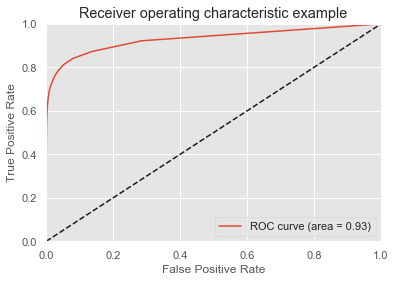

In [89]:
from sklearn.metrics import roc_curve, auc

probas = rf.predict_proba(X_test)
# probas est une matrice de deux colonnes avec la proabilit√©s d'appartenance √† chaque classe

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right");

- Matrice de confusion

In [90]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[187717    216]
 [  3238   3708]]


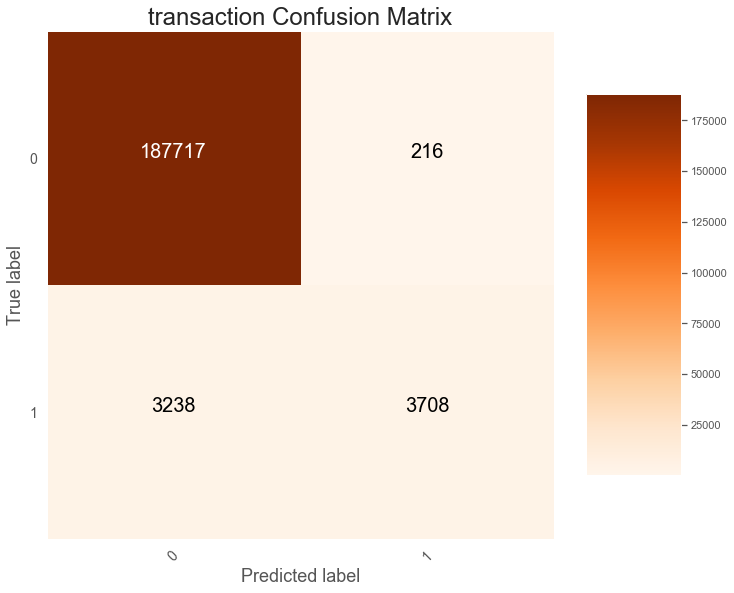

In [91]:
cm = confusion_matrix(y_test, rf_predict)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'transaction Confusion Matrix')


Cela montre les classifications pr√©vues par le mod√®le sur les donn√©es de test ainsi que les labels r√©els. Nous pouvons voir que notre mod√®le a de nombreux faux positifs (une transaction non frauduleuse pr√©dite mais en fait une transaction frauduleuse)

**Optimisation Random Forest:**

- **Option 1:**

En s'aidant de l'article de William Koehrsen, ¬´Hyperparameter Tuning the Random Forest in Python¬ª 

On a utilis√© RandomizedSearchCV de sklearn pour optimiser nos hyperparamateurs. Koehrsen utilise une grille compl√®te d'hyperparam√®tres dans son article, mais on a trouv√© que cela pouvait prendre beaucoup de temps pour s'ex√©cuter dans la pratique. on a d√©cid√© de me concentrer sur 3 hyperparam√®tres: n_estimators, max_features et max_depth.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 10)]
max_features = [‚Äòauto‚Äô, ‚Äòsqrt‚Äô]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)# create random grid
random_grid = {
 ‚Äòn_estimators‚Äô: n_estimators,
 ‚Äòmax_features‚Äô: max_features,
 ‚Äòmax_depth‚Äô: max_depth
 }# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)
print(rfc_random.best_params_)

- **Option 2:**

Afin de maximiser les performances de notre mod√®le, on peut effectuer une recherche al√©atoire de meilleurs hyperparam√®tres. Cela s√©lectionnera de mani√®re al√©atoire des combinaisons d'hyperparam√®tres √† partir d'une grille, les √©valuera √† l'aide d'une validation crois√©e sur les donn√©es d'entra√Ænement et renverra les valeurs les plus performantes.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 700, num = 10)]
max_features = [‚Äòauto‚Äô, ‚Äòsqrt‚Äô]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)# create random grid
random_grid = {
 ‚Äòn_estimators‚Äô: n_estimators,
 ‚Äòmax_features‚Äô: max_features,
 ‚Äòmax_depth‚Äô: max_depth
 }# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)
print(rfc_random.best_params_)

On a fait tourner cette partie du code sur un ordinateur plus puissant, l'agorithme a fait 300 calculs et 3 fit et pour chaque fit 100 estimation. temps de calcul 9h 

R√©sultat: n_estimators = 485, max_features='sqrt',max_depth=164

**Variables importantes:**

On jete un oeil aux variables consid√©r√©es comme les plus importantes par notre mod√®le. Les valeurs sont calcul√©es se basant sur le coefficient de Gini de l'impuret√© d'un noeud.

In [92]:
fi = []
fiName = []
for feat, importance in zip(X.columns, rf.feature_importances_):
  if importance!= 0:
      fi.append(importance)
      fiName.append(feat)
      print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: ProductCD_C, importance: 0.004154933697053081
feature: ProductCD_H, importance: 0.0026548589477266983
feature: ProductCD_R, importance: 0.0017924443845828667
feature: ProductCD_S, importance: 0.0015268560632431994
feature: ProductCD_W, importance: 0.0006456769144813297
feature: card4_american express, importance: 0.0011212459464125838
feature: card4_discover, importance: 0.003510484230494532
feature: card4_mastercard, importance: 0.01004019689366148
feature: card4_visa, importance: 0.01058574860279832
feature: R_emaildomain_aim.com, importance: 4.219884864920845e-05
feature: R_emaildomain_anonymous.com, importance: 0.004740872779379804
feature: R_emaildomain_aol.com, importance: 0.0008225190009040987
feature: R_emaildomain_att.net, importance: 5.2228840617408393e-05
feature: R_emaildomain_bellsouth.net, importance: 4.172146276808486e-05
feature: R_emaildomain_cableone.net, importance: 1.086113118724693e-06
feature: R_emaildomain_centurylink.net, importance: 4.886501849679743e-

In [93]:
len(fi)

126

On a au total 126 variables importantes.

On trace 10 variables importantes retourner par notre mod√®le

No handles with labels found to put in legend.


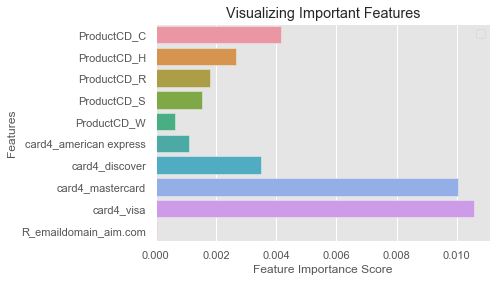

In [94]:
sns.barplot(x=fi[0:10], y=fiName[0:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

**Utilisation du meilleur mod√®le (variables importantes)**

Maintenant, on va prendre le meilleur mod√®le (qui a √©t√© form√©) et l'√©valuer. Esp√©rons que celui l√† retourne un meilleur r√©sultat

In [95]:
X_trainEncodedBest = X_train[fiName]
X_testEncodedBest = X_test[fiName]

- **Option 1:**

In [96]:
rf_best=RandomForestClassifier( n_estimators = 485, max_features='sqrt',max_depth=164)

In [98]:
tstart=time.time()
rf_best.fit(X_trainEncodedBest,y_train)
tend = time.time()
temps(tend-tstart)

temps : 00:08:01


In [99]:
rf_predict_best = rf_best.predict(X_testEncodedBest)

Confusion matrix, without normalization
[[187714    219]
 [  3166   3780]]


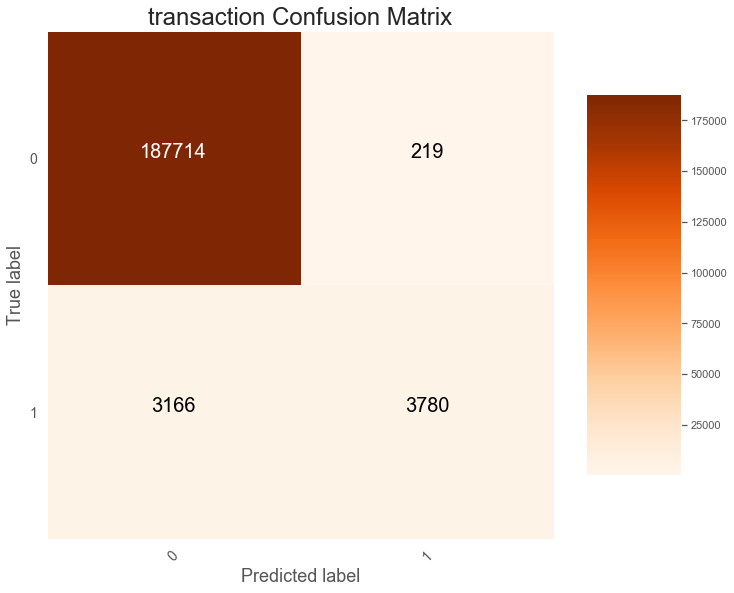

In [100]:
cm = confusion_matrix(y_test, rf_predict_best)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'transaction Confusion Matrix')

Area under the ROC curve : 0.944634


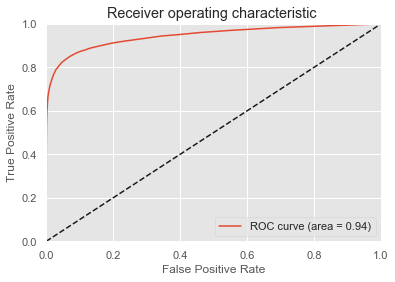

In [102]:
from sklearn.metrics import roc_curve, auc

probas = rf_best.predict_proba(X_testEncodedBest)
# probas est une matrice de deux colonnes avec la proabilit√©s d'appartenance √† chaque classe

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right");

- **Option 2:**

In [ ]:
rf_best2=RandomForestClassifier( n_estimators = 188,min_samples_split=2,max_leaf_nodes= 33,max_features=0.79
                               ,max_depth=12,bootstrap= True)

In [ ]:
tstart=time.time()
rf_best2.fit(X_trainEncodedBest_rf,y_train)
tend = time.time()
temps(tend-tstart)

In [ ]:
rf_predict_best2 = rf_best2.predict(X_testEncodedBest_rf)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,rf_predict_best2 ))

On remarque une tr√®s l√©g√®re am√©lioration, l'accuracy est pass√©e de 98,23% √† 98,26% cel√† est peut √™tre d√ª aux hyperparam√®tres choisis par nous m√™me. On a essay√© de faire une recherche al√©atoire des meilleurs hyperparam√®tres . Cette m√©thode n'a pas retourn√© un meilleur r√©sultat. 

## Adaptive Boosting

Adaboost combine plusieurs apprenants faibles en un seul apprenant fort. 

Les apprenants faibles dans AdaBoost sont des arbres de d√©cision avec une seule division, appel√©s souches de d√©cision. 

Lorsque AdaBoost cr√©e son premier noeud de d√©cision, toutes les observations sont pond√©r√©es de mani√®re √©gale. Pour corriger l'erreur pr√©c√©dente, les observations incorrectement class√©es ont d√©sormais plus de poids que les observations correctement class√©es. Les algorithmes AdaBoost peuvent √™tre utilis√©s pour les probl√®mes de classification.

Optimisation des hyperparam√®tres

In [ ]:
parameters = {'learning_rate': [0.01, 0.05, 0.1, 1]}
gridCv = GridSearchCV(AdaBoostClassifier(), param_grid= parameters, cv=3, scoring='roc_auc')

In [ ]:
begin = time.time()
gridCv.fit(X,Y)
end = time.time()

In [ ]:
print("Time execution for optimizing hyperparapeter is {a} minutes.".format(a =(end-begin)/60))

Meilleur param√®tre, meileur estimateur et AUC

In [ ]:
gridCv.best_params_

In [ ]:
gridCv.best_estimator_

In [ ]:
gridCv.best_score_

Model AdaBoost avec toutes les variables

In [ ]:
Model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=50, random_state=None)

In [ ]:
Model.fit(X,Y)

Probabilit√©s pr√©dites par le mod√®le

In [ ]:
predictedProba1 = pd.DataFrame(Model.predict_proba(X_test), columns=['0','1'])


In [ ]:
fraudTransaction = predictedProba1['1']
nonFraudTransaction = predictedProba1['0']

Adaboost Model avec seulement les variables importantes :

On utilise la m√©thode feature_importances_ pour trouver les variables importantes.

In [ ]:
importantFeature = []
importantFeatureName = []
for feat, importance in zip(X.columns, gridCv.best_estimator_.feature_importances_):
  if importance!= 0:
      importantFeature.append(importance)
      importantFeatureName.append(feat)
      print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

In [ ]:
X_trainEncodedBest = X_train[importantFeatureName]
X_testEncodedBest = X_test[importantFeatureName]

In [ ]:
begin = time.time()
crossValScore = cross_val_score(Model, X_trainEncodedBest, y_train, cv= 3, scoring='roc_auc')
end = time.time()

In [ ]:
print("auc score is: {f}".format(f=np.mean(crossValScore)))
print("Time ex√©cution is {a} minutes".format(a = (end-begin)/60))

Probabilit√©s des transactions frauduleuse pr√©dites par ce mod√®le

In [ ]:
predictedProba2 = pd.DataFrame(bestModel.predict_proba(X_test), columns=['0','1'])

In [ ]:
fraudTransaction = predictedProba['1']
nonFraudTransaction = predictedProba['0']

In [ ]:
fraudTransaction.index = transactionIDTest
nonFraudTransaction.index = transactionIDTest

In [ ]:
fraudTransaction.head()

In [ ]:
nonFraudTransaction.head()

In [ ]:
predictedProbaFraud1 = saveCSV(fraudTransaction, "predictedProbaFraud1.csv")
predictedProbaNonFraud1 = saveCSV(nonFraudTransaction, "predictedProbaNonFraud1.csv")

Le mod√®le prenant en compte toutes les variables est long mais donne une meilleure valeur de l'AUC (0.88).

En ne prenant que les variables importantes on trouve un score de l'AUC de 0.8, et le temps d'ex√©cution est moins long.